In [1]:
#Import the main libraries (numpy, pandas, seaborn, matplotlib)
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
#Use the multiTimeline.csv data.
data = pd.read_csv('multiTimeline.csv')
data.head()

,Month,Diet,Gym,Finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


## Check the information about the data.

In [3]:
# Check the shape of the data
data.shape

(168, 4)

In [4]:
# Check the overall info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    168 non-null    object
 1   Diet     168 non-null    int64 
 2   Gym      168 non-null    int64 
 3   Finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [5]:
# Check the numerical data stats
data.describe()

,Diet,Gym,Finance
count,168.000000,168.000000,168.000000
mean,49.642857,34.690476,47.148810
std,8.033080,8.134316,4.972547
min,34.000000,22.000000,38.000000
25%,44.000000,28.000000,44.000000
50%,48.500000,32.500000,46.000000
75%,53.000000,41.000000,50.000000
max,100.000000,58.000000,73.000000


In [6]:
# Missing values
data.isnull().sum()

Month      0
Diet       0
Gym        0
Finance    0
dtype: int64

In [7]:
# Outliers
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Diet,Gym,Finance
count,168.000000,168.000000,168.000000
mean,49.642857,34.690476,47.148810
std,8.033080,8.134316,4.972547
min,34.000000,22.000000,38.000000
25%,44.000000,28.000000,44.000000
50%,48.500000,32.500000,46.000000
75%,53.000000,41.000000,50.000000
90%,58.300000,47.000000,54.000000
95%,64.000000,50.650000,57.000000
99%,72.990000,53.990000,60.330000


In [8]:
#Convert Month column into DateTime datatype
data['Month'] = pd.to_datetime(data['Month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    168 non-null    datetime64[ns]
 1   Diet     168 non-null    int64         
 2   Gym      168 non-null    int64         
 3   Finance  168 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.4 KB


In [9]:
#Make Month column as the index
data.set_index('Month', inplace=True)
data.head()

,Diet,Gym,Finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


Text(0.5, 0, 'Year')

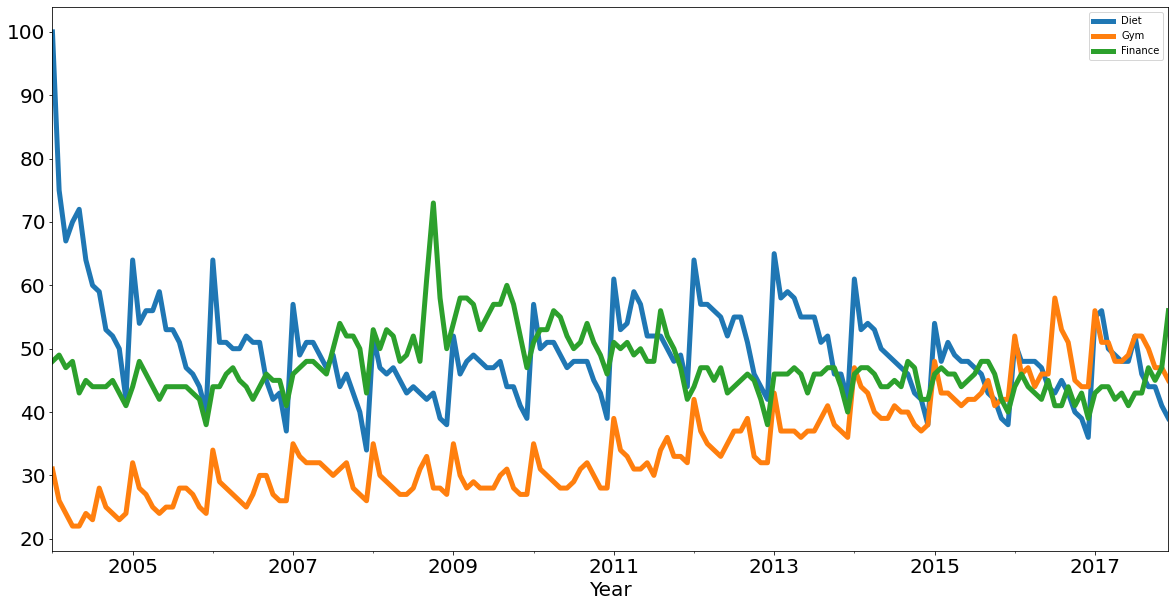

In [17]:
#Visualize the data with matplotlib.
data.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

## Plotting Diet

Text(0.5, 1.0, 'Diet')

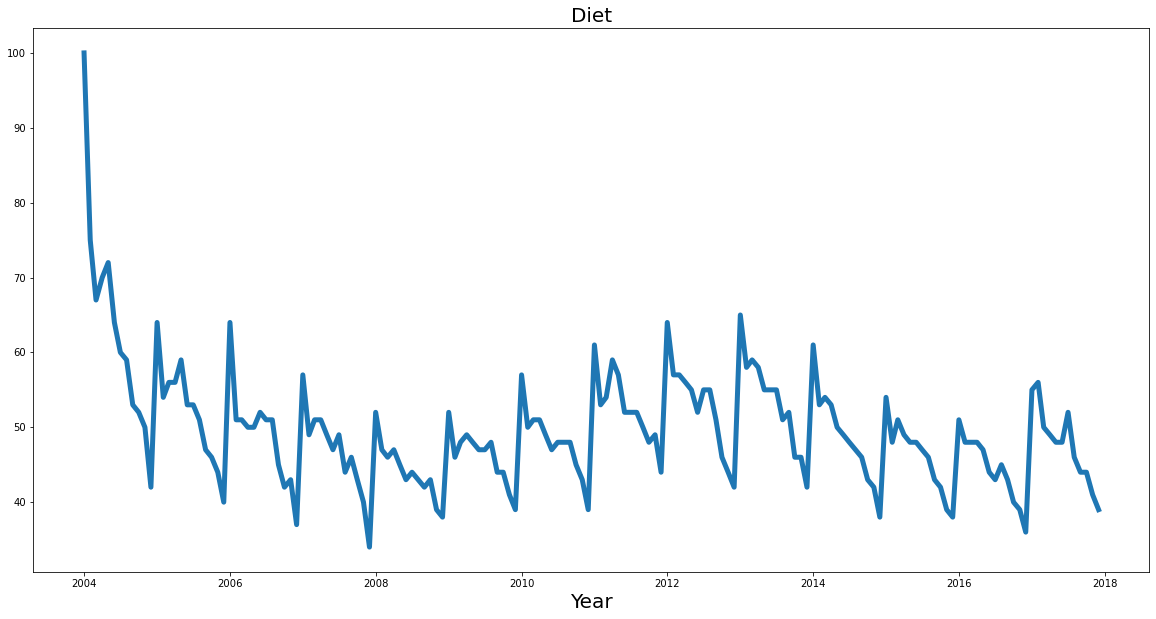

In [18]:
plt.figure(figsize=(20,10))
plt.plot(data['Diet'], linewidth=5)
plt.xlabel('Year', fontsize=20)
plt.title("Diet", fontsize=20)

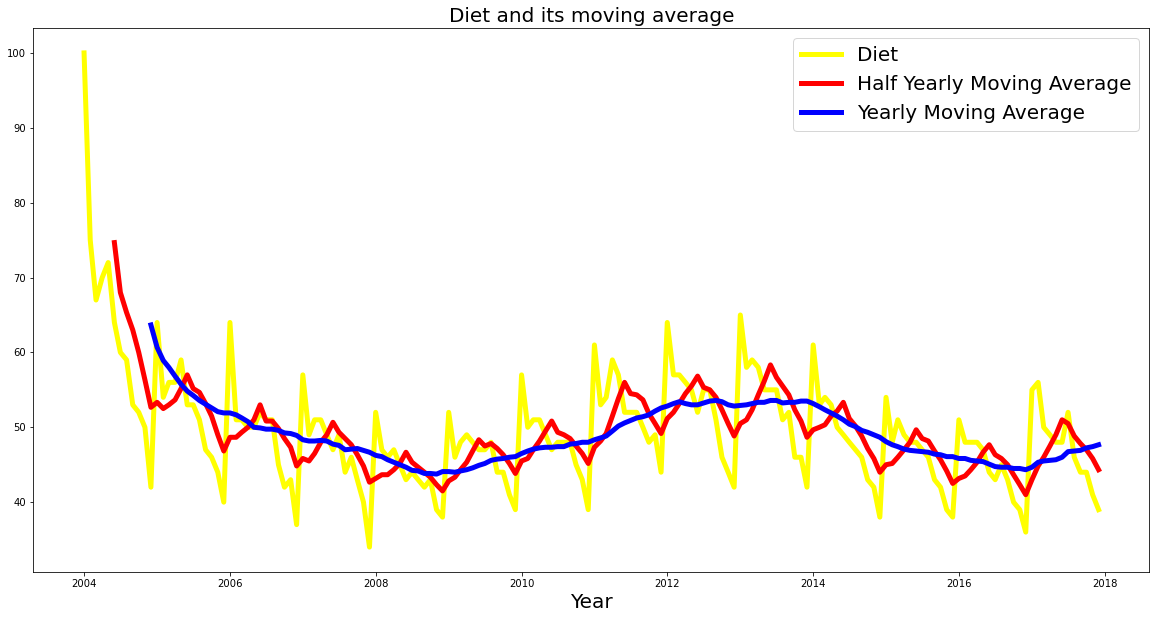

In [19]:
#Moving Average
#We will do it yearly and half yearly.
plt.figure(figsize=(20,10))
data['HalfYearlyDiet'] = data['Diet'].rolling(window=6).mean()
data['YearlyDiet'] = data['Diet'].rolling(window=12).mean()
plt.plot(data.index, data['Diet'], label="Diet", color="yellow", linewidth=5)
plt.plot(data.index, data['HalfYearlyDiet'], label="Half Yearly Moving Average", color="red", linewidth=5)
plt.plot(data.index, data['YearlyDiet'], label="Yearly Moving Average", color="blue", linewidth=5)
plt.legend(prop={"size":20})
plt.xlabel('Year', fontsize=20)
plt.title("Diet and its moving average", fontsize=20)
plt.show()

## Plotting Gym

Text(0.5, 1.0, 'Gym')

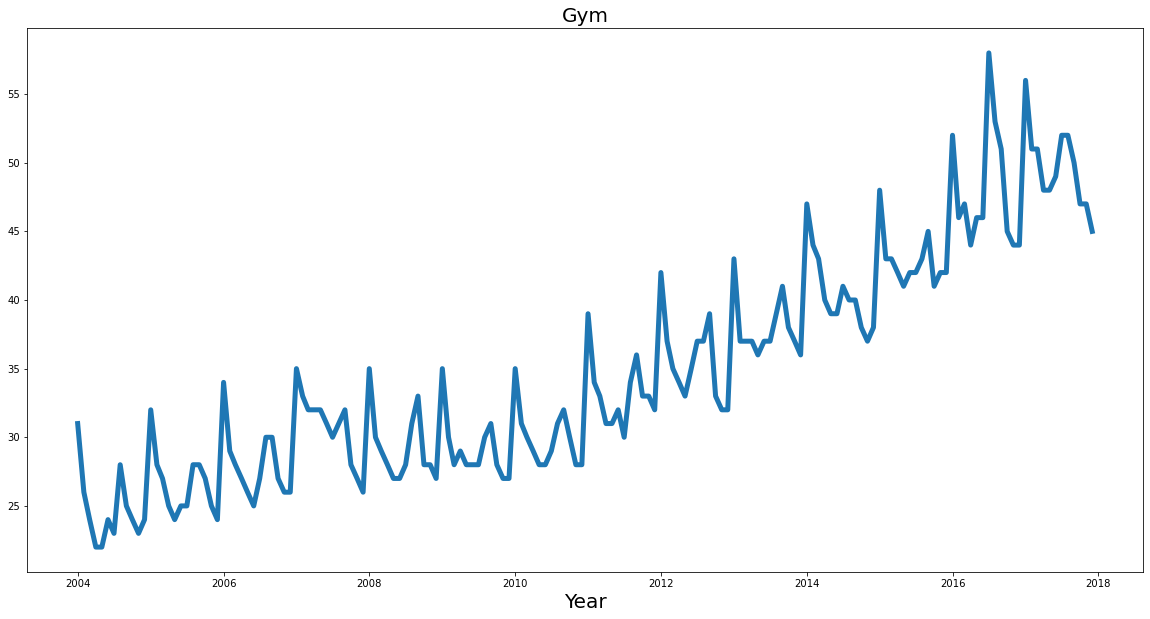

In [20]:
plt.figure(figsize=(20,10))
plt.plot(data['Gym'], linewidth=5)
plt.xlabel('Year', fontsize=20)
plt.title("Gym", fontsize=20)

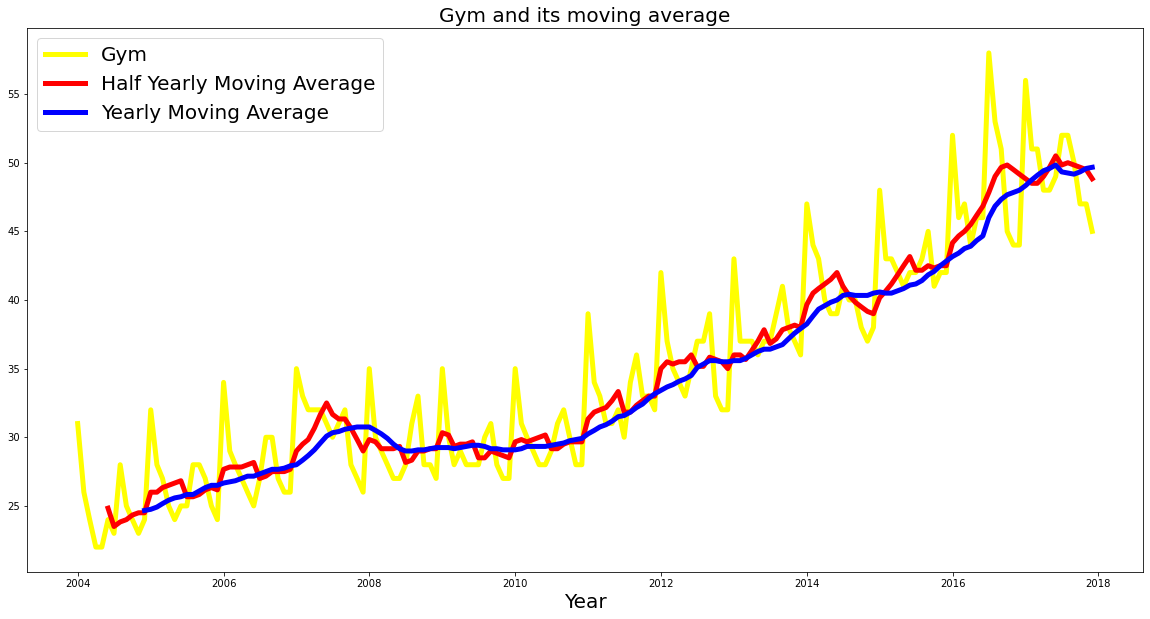

In [21]:
#Moving Average
#We will do it yearly and half yearly.
plt.figure(figsize=(20,10))
data['HalfYearlyGym'] = data['Gym'].rolling(window=6).mean()
data['YearlyGym'] = data['Gym'].rolling(window=12).mean()
plt.plot(data.index, data['Gym'], label="Gym", color="yellow", linewidth=5)
plt.plot(data.index, data['HalfYearlyGym'], label="Half Yearly Moving Average", color="red", linewidth=5)
plt.plot(data.index, data['YearlyGym'], label="Yearly Moving Average", color="blue", linewidth=5)
plt.legend(prop={"size":20})
plt.xlabel('Year', fontsize=20)
plt.title("Gym and its moving average", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Diet and Gym Trend')

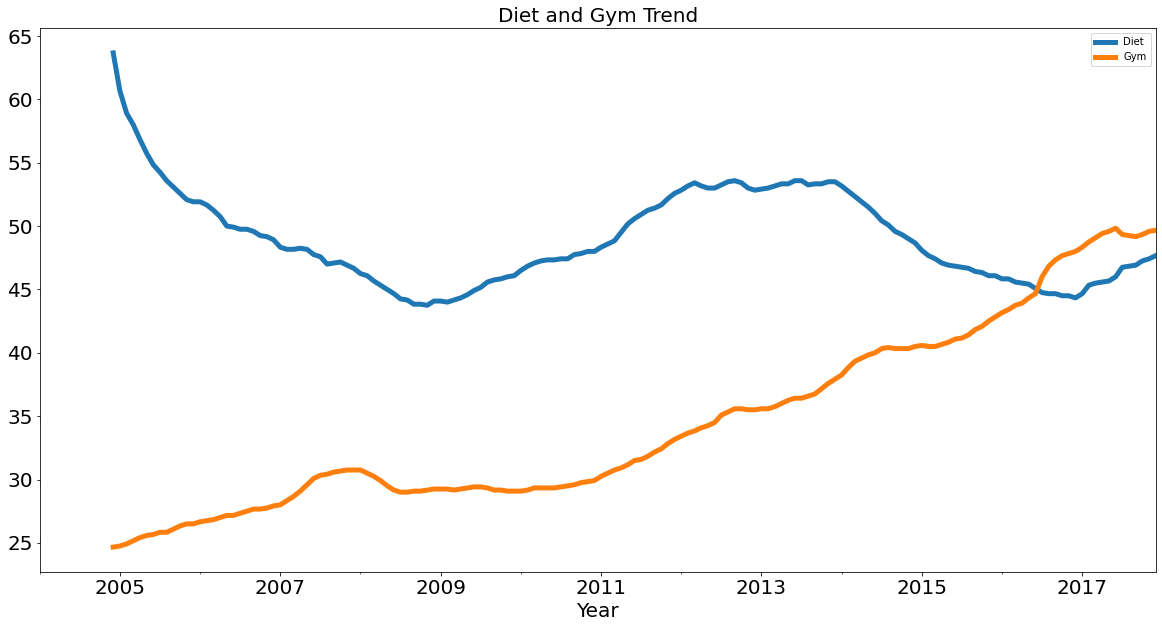

In [22]:
#Trend of diet and gym
trend = pd.concat([data[['Diet']].rolling(12).mean(), data[['Gym']].rolling(12).mean()], axis=1)
trend.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.title('Diet and Gym Trend', fontsize=20)

## Seasonal Components

Text(0.5, 1.0, 'Seasonal Component for Diet')

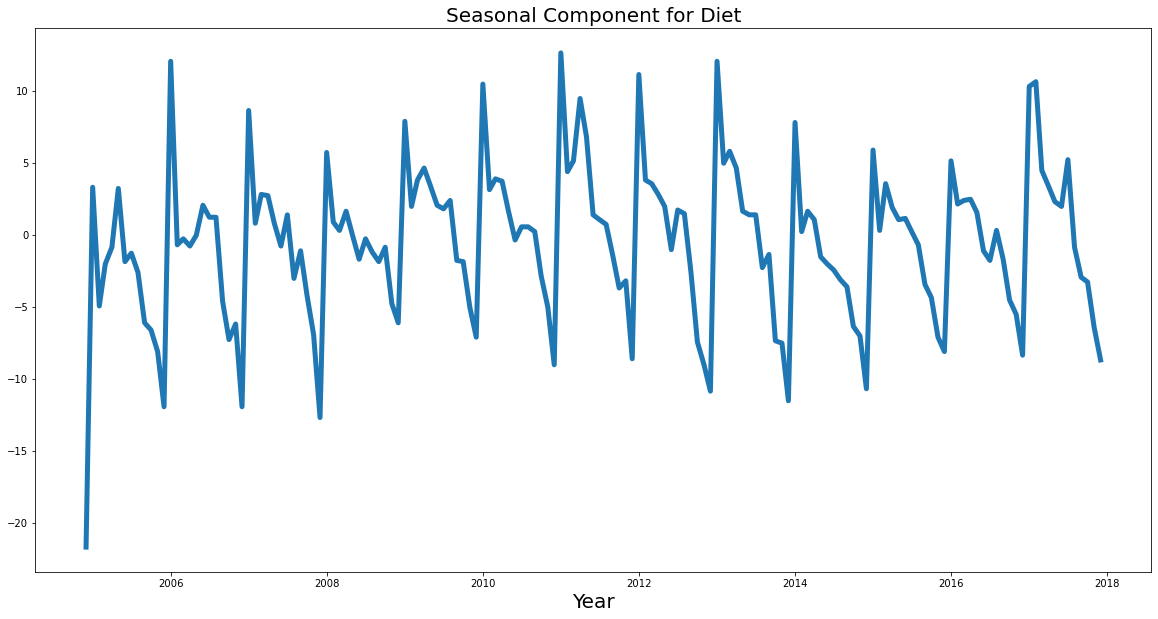

In [23]:
#method 1: Finding difference by subtracting the trend
plt.figure(figsize=(20,10))
data['DietDiff'] = data['Diet'] - data['YearlyDiet']
plt.plot(data.index, data['DietDiff'], linewidth=5)
plt.xlabel('Year', fontsize=20)
plt.title("Seasonal Component for Diet", fontsize=20)

Text(0.5, 1.0, 'Seasonal Component for Diet')

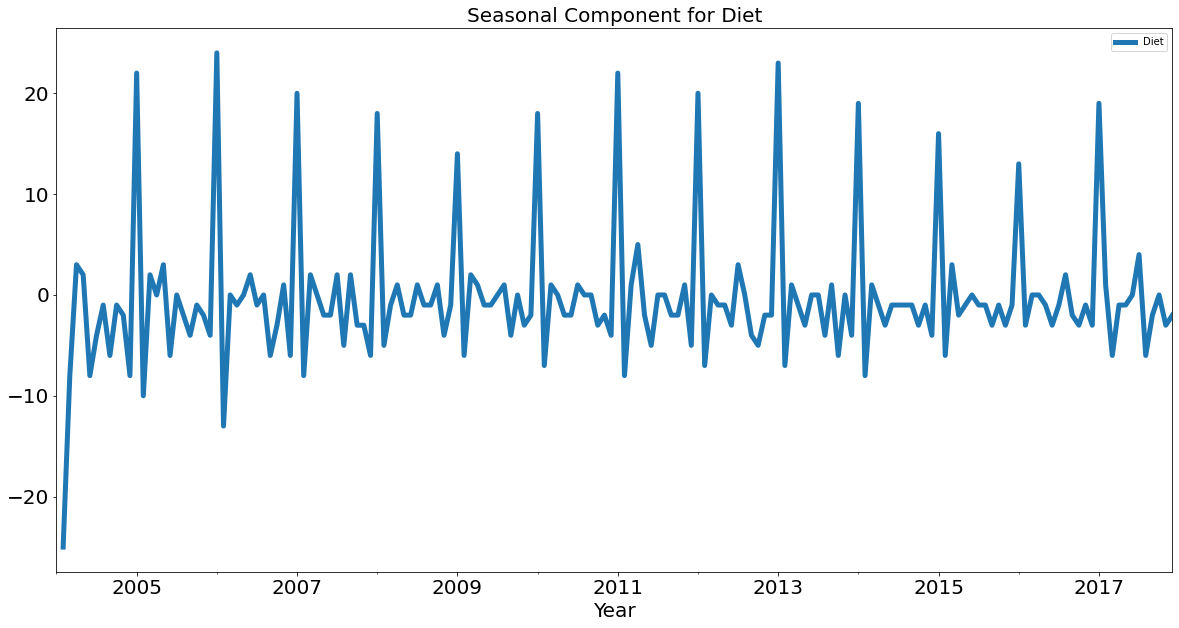

In [24]:
#method 2: Using differencing
data[['Diet']].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title("Seasonal Component for Diet", fontsize=20)

Text(0.5, 1.0, 'Seasonal Component for Gym')

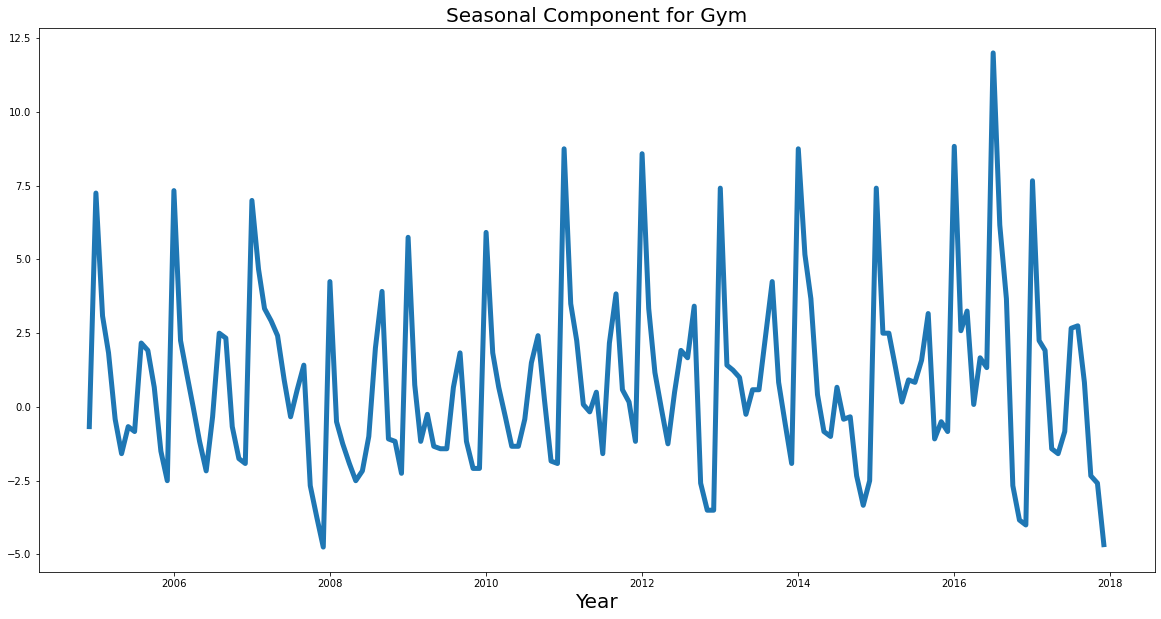

In [25]:
#method 1: Finding difference by subtracting the trend
plt.figure(figsize=(20,10))
data['GymDiff'] = data['Gym'] - data['YearlyGym']
plt.plot(data.index, data['GymDiff'], linewidth=5)
plt.xlabel('Year', fontsize=20)
plt.title("Seasonal Component for Gym", fontsize=20)

Text(0.5, 1.0, 'Seasonal Component for Gym')

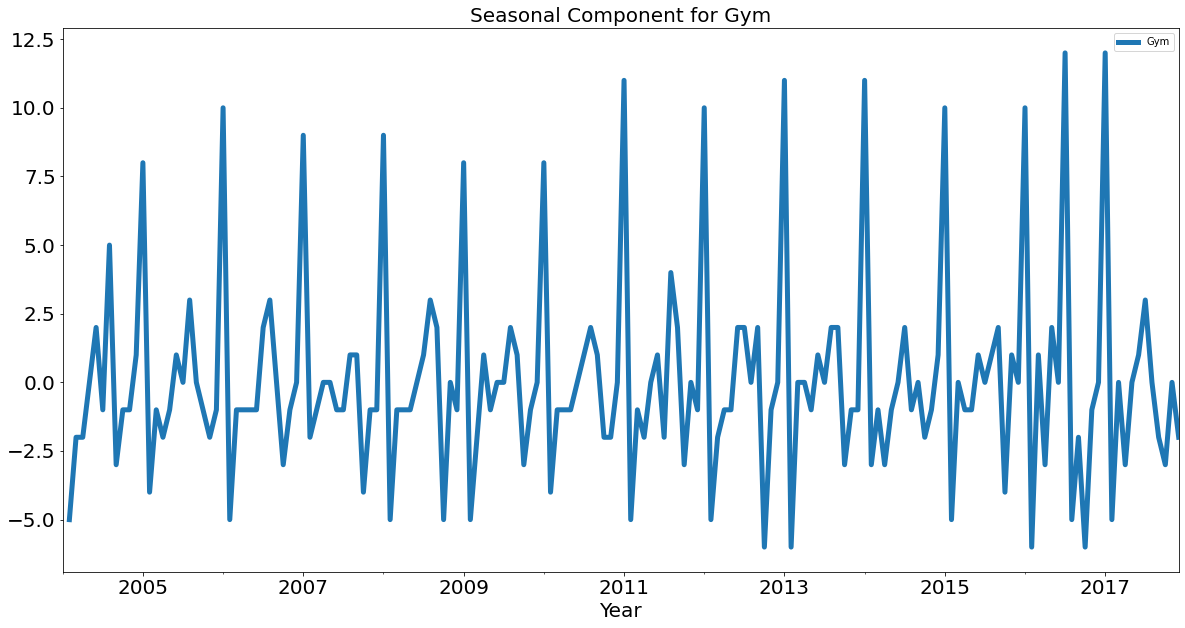

In [19]:
#method 2: Using differencing
data[['Gym']].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title("Seasonal Component for Gym", fontsize=20)

Text(0.5, 1.0, 'Seasonal Component for Finance')

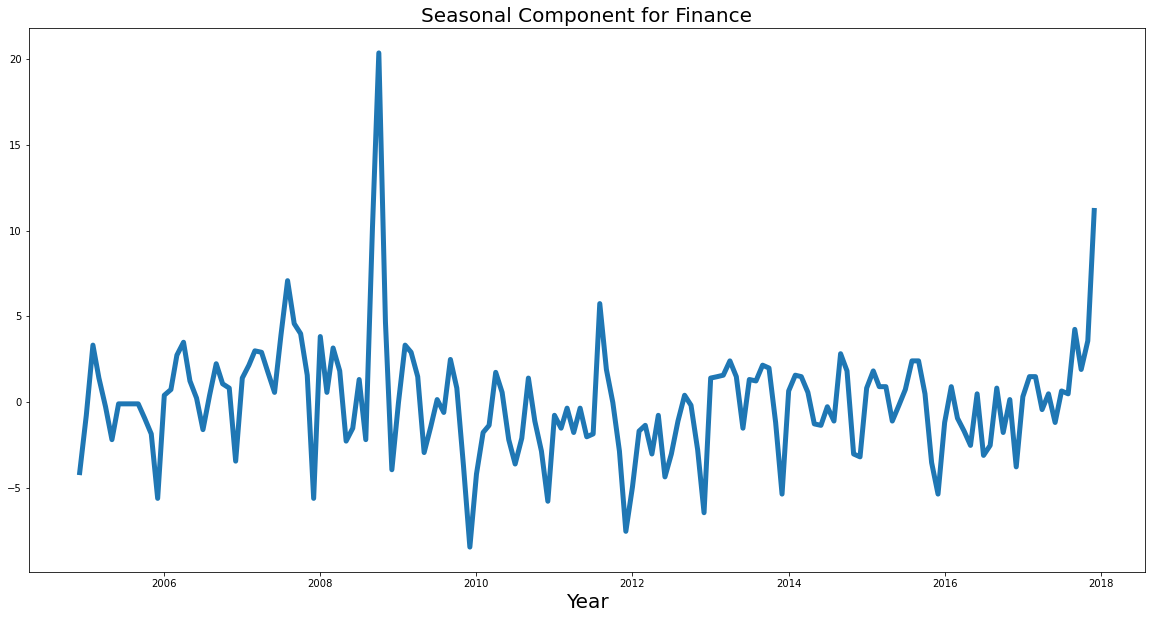

In [20]:
#method 1: Finding difference by subtracting the trend
plt.figure(figsize=(20,10))
data['FinanceDiff'] = data['Finance'] - data['Finance'].rolling(window=12).mean()
plt.plot(data.index, data['FinanceDiff'], linewidth=5)
plt.xlabel('Year', fontsize=20)
plt.title("Seasonal Component for Finance", fontsize=20)

Text(0.5, 1.0, 'Seasonal Component for Finance')

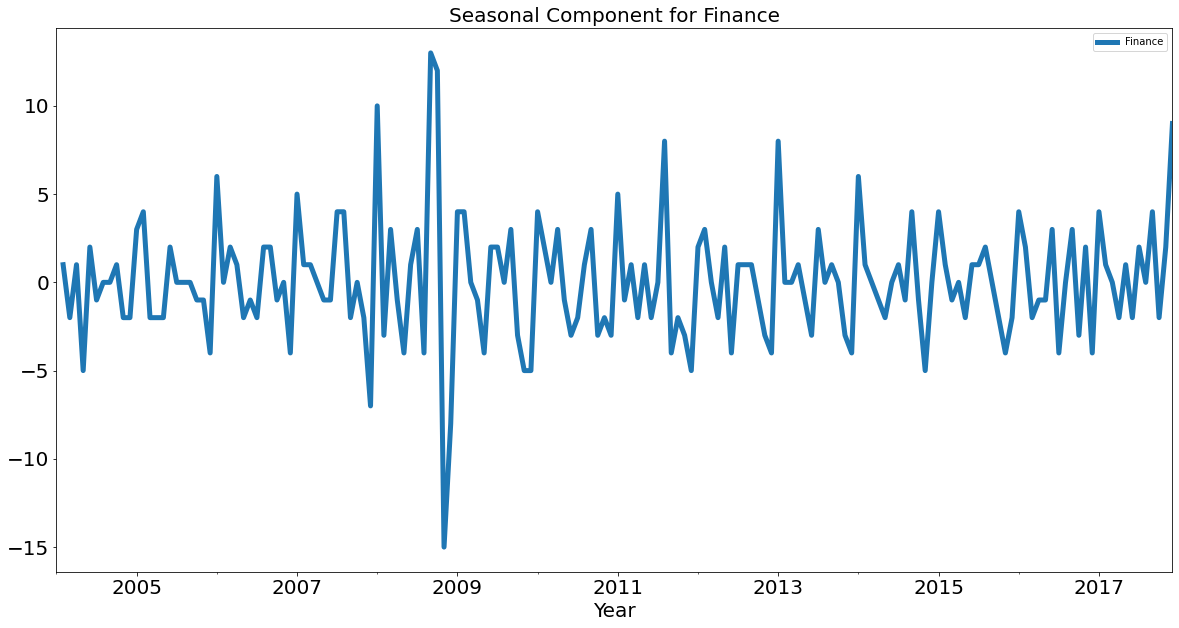

In [21]:
#method 2: Using differencing
data[['Finance']].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title("Seasonal Component for Finance", fontsize=20)

In [26]:
#Finding correlation
data[["Diet","Gym","Finance"]].corr()

,Diet,Gym,Finance
Diet,1.000000,-0.100764,-0.034639
Gym,-0.100764,1.000000,-0.284279
Finance,-0.034639,-0.284279,1.000000


Text(0.5, 1.0, 'First Order Differnce')

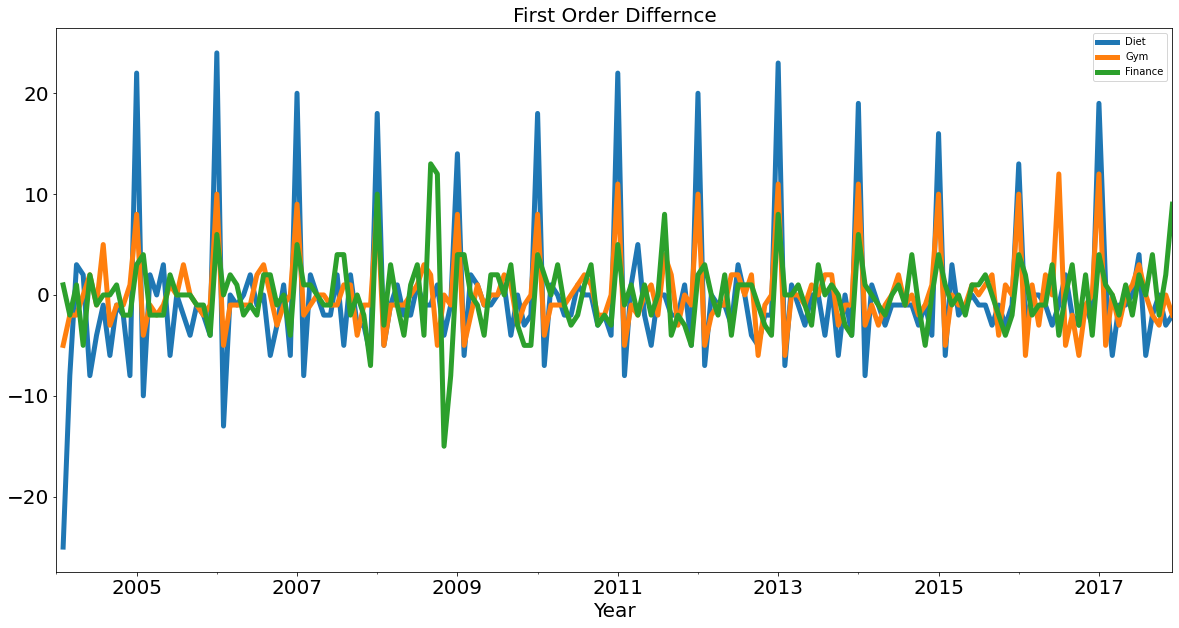

In [23]:
#Plotting the first order difference
data[["Diet","Gym","Finance"]].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.title('First Order Differnce', fontsize=20)

In [24]:
#Computing the correlation coefficients of the first-order differences
data[["Diet","Gym","Finance"]].diff().corr()

,Diet,Gym,Finance
Diet,1.000000,0.758707,0.373828
Gym,0.758707,1.000000,0.301111
Finance,0.373828,0.301111,1.000000


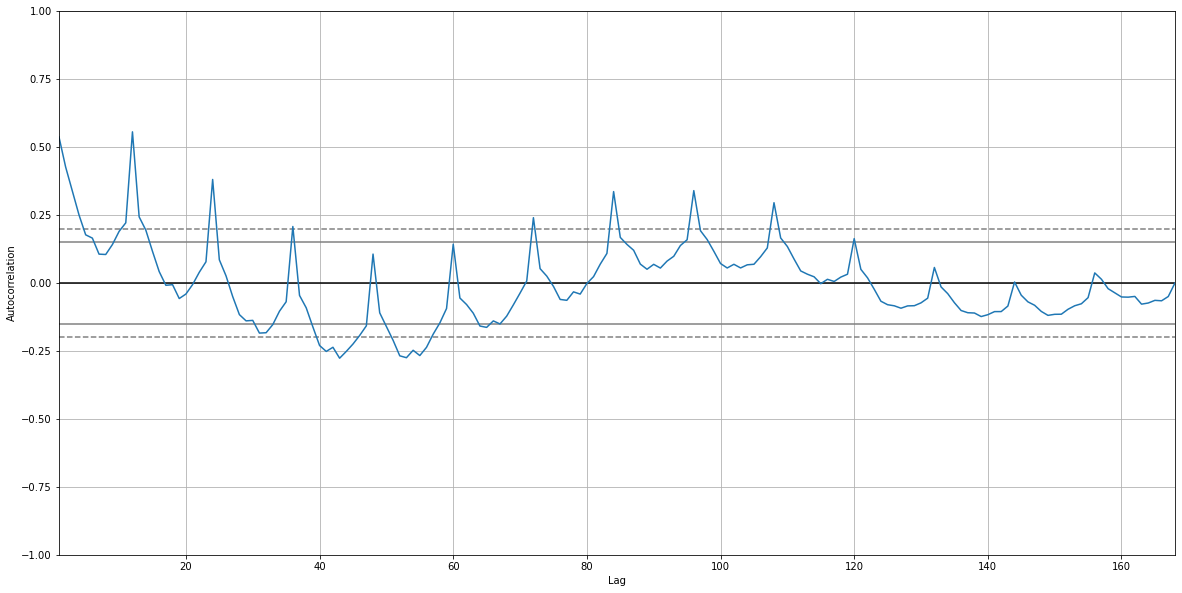

In [25]:
#Plotting the auto-correlation for diet
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(data['Diet']);

1. What do the dotted lines represent?
-> The dotted lines in the above plot represent the statistical significance of the correlation. The more the data is above the dotted line, the more significant or correlated the data is and vice versa. In this case, you can say that the 'diet' series is genuinely autocorrelated with a lag of twelve months.

2. What is the seasonality?
-> Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year. Any predictable fluctuation or pattern that recurs or repeats over a one-year period is said to be seasonal.
(https://www.investopedia.com/terms/s/seasonality.asp#:~:text=What%20Is%20Seasonality%3F,is%20said%20to%20be%20seasonal.)